In [350]:
import pandas as pd
import pyreadr as pr
import matplotlib.pyplot as plt
import math as m
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from scipy.interpolate import make_interp_spline, BSpline


## Autoři

In [7]:
print("Autoři: Albert Švehla, Adam Formánek, Tran Viet Anh.")
print("\nParametry:")
print("""
K = 5\n
L = 6\n
M = 1\n
""")

Autoři: Albert Švehla, Adam Formánek, Tran Viet Anh.

Parametry:

K = 5

L = 6

M = 1




## Read .rda file and save as .csv

In [351]:
df = []
pr.read_r('case0101.rda')
result = pr.read_r('case0101.rda')
df = result['case0101']
df.to_csv('data_new.csv', index = False)



## Load .csv file

In [352]:
df = pd.read_csv('data_new.csv')
print('Název vzorku: case0101')
print('Velikost vzorku: ', len(df))
print('Obsah vzorku:')
display(df)

Název vzorku: case0101
Velikost vzorku:  47
Obsah vzorku:


Score  Treatment
0    5.000000  Extrinsic
1    5.400000  Extrinsic
2    6.100000  Extrinsic
3   10.900000  Extrinsic
4   11.800000  Extrinsic
5   12.000000  Extrinsic
6   12.300000  Extrinsic
7   14.800000  Extrinsic
8   15.000000  Extrinsic
9   16.799999  Extrinsic
10  17.200001  Extrinsic
11  17.200001  Extrinsic
12  17.400000  Extrinsic
13  17.500000  Extrinsic
14  18.500000  Extrinsic
15  18.700001  Extrinsic
16  18.700001  Extrinsic
17  19.200001  Extrinsic
18  19.500000  Extrinsic
19  20.700001  Extrinsic
20  21.200001  Extrinsic
21  22.100000  Extrinsic
22  24.000000  Extrinsic
23  12.000000  Intrinsic
24  12.000000  Intrinsic
25  12.900000  Intrinsic
26  13.600000  Intrinsic
27  16.600000  Intrinsic
28  17.200001  Intrinsic
29  17.500000  Intrinsic
30  18.200001  Intrinsic
31  19.100000  Intrinsic
32  19.299999  Intrinsic
33  19.799999  Intrinsic
34  20.299999  Intrinsic
35  20.500000  Intrinsic
36  20.600000  Intrinsic
37  21.299999  Intrinsic
38  21.600000  Intrinsic
39  22.100000  Intrinsic
40  22.200001  Intrinsic
41  22.600000  Intrinsic
42  23.100000  Intrinsic
43  24.000000  Intrinsic
44  24.299999  Intrinsic
45  26.700001  Intrinsic
46  29.700001  Intrinsic

Dataset case0101 obsahuje dvě proměnné: <br>
<b>Score</b> - popisující skóre v kreativitě <br>
<b>Treatment</b> - popisující typ motivace - vnitřní = <b>intristic</b> a vnější = <b>extrinsic</b>

## Úloha 01

Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Data stručně popište a pro každu skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.

In [385]:
df_extrinsic = df.loc[df['Treatment'] == 'Extrinsic'].reset_index()
df_intrinsic = df.loc[df['Treatment'] == 'Intrinsic'].reset_index()

def analyze(dataset):
    print("Střední hodnota: ", round(dataset.mean()["Score"], 2))
    print("Rozptyl: ", round(dataset.std()["Score"], 2))
    print("Medián: ", round(dataset.median()["Score"],2))
    print("Variance: ", round(dataset.var()["Score"],2))


print("Extrinsic")
print('Velikost vzorku typu motivace Extrinsic: ', len(df_extrinsic))
analyze(df_extrinsic)
display(df_extrinsic)
print('_________________________')
print("Intrinsic")
print('Velikost vzorku typu motivace Intrinsic: ', len(df_intrinsic))
analyze(df_intrinsic)
display(df_intrinsic)



Extrinsic
Velikost vzorku typu motivace Extrinsic:  23
Střední hodnota:  15.74
Rozptyl:  5.25
Medián:  17.2
Variance:  27.59


index      Score  Treatment
0       0   5.000000  Extrinsic
1       1   5.400000  Extrinsic
2       2   6.100000  Extrinsic
3       3  10.900000  Extrinsic
4       4  11.800000  Extrinsic
5       5  12.000000  Extrinsic
6       6  12.300000  Extrinsic
7       7  14.800000  Extrinsic
8       8  15.000000  Extrinsic
9       9  16.799999  Extrinsic
10     10  17.200001  Extrinsic
11     11  17.200001  Extrinsic
12     12  17.400000  Extrinsic
13     13  17.500000  Extrinsic
14     14  18.500000  Extrinsic
15     15  18.700001  Extrinsic
16     16  18.700001  Extrinsic
17     17  19.200001  Extrinsic
18     18  19.500000  Extrinsic
19     19  20.700001  Extrinsic
20     20  21.200001  Extrinsic
21     21  22.100000  Extrinsic
22     22  24.000000  Extrinsic

_________________________
Intrinsic
Velikost vzorku typu motivace Intrinsic:  24
Střední hodnota:  19.88
Rozptyl:  4.44
Medián:  20.4
Variance:  19.71


index      Score  Treatment
0      23  12.000000  Intrinsic
1      24  12.000000  Intrinsic
2      25  12.900000  Intrinsic
3      26  13.600000  Intrinsic
4      27  16.600000  Intrinsic
5      28  17.200001  Intrinsic
6      29  17.500000  Intrinsic
7      30  18.200001  Intrinsic
8      31  19.100000  Intrinsic
9      32  19.299999  Intrinsic
10     33  19.799999  Intrinsic
11     34  20.299999  Intrinsic
12     35  20.500000  Intrinsic
13     36  20.600000  Intrinsic
14     37  21.299999  Intrinsic
15     38  21.600000  Intrinsic
16     39  22.100000  Intrinsic
17     40  22.200001  Intrinsic
18     41  22.600000  Intrinsic
19     42  23.100000  Intrinsic
20     43  24.000000  Intrinsic
21     44  24.299999  Intrinsic
22     45  26.700001  Intrinsic
23     46  29.700001  Intrinsic

## Úloha 02

Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.

In [401]:
def show_plots(df_input, desc):
    plt.style.use('ggplot')
    plt.hist(df_input, bins=6, alpha=0.7)
    plt.xlabel('Score')
    plt.ylabel('Density')
    plt.title(f'Histogram skóre pro {desc} motivaci')
    plt.show()
    plt.title(f'Hustota skóre pro {desc} motivaci')
    sns.kdeplot(df_input,color='royalblue')
    plt.show()

def show_cdf(df_input, desc):
    
    df_input['Score'].plot.hist(cumulative=True, alpha=0.7,density=True, title=f"Empirická distribuční funkce pro {desc} motivaci")
    df_test = df_input.sort_values('Score')
    df_test = df_test.reset_index().drop(columns=['Treatment', 'index'])
    list_x = df_test['Score'].to_numpy()
    list_y = np.linspace(0.,1.,len(list_x))
    plt.figure()
    poly = np.polyfit(list_x,list_y,5)
    poly_y = np.poly1d(poly)(list_x)
    plt.plot(list_x,poly_y, color='green')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribuční funkce pro {desc} motivaci')
    plt.show()


Funkce `show_plots` vykresluje histogram vzorku a v závislosti na ní předpovězenou hustotu. 
<br>
Funkce `show_cdf` vykresluje empirickou distribuční funkci vzorku a v závislosti na ní předpovězenou distribuční funkce. Empirická distribuční funkce se v pandas vykresluje stejnou funkcí jako histogram s přidáním parametru `cumulative=True`.
<br>
Parametr `bins`, počet přihrádek rozvržení, byl zvolen experimentálně tak, aby v grafu nevznikaly velké skoky 
<br>
Parameter `density` transformuje osu Y na škálu 0-1.
<br>

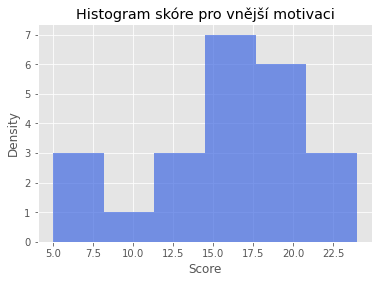

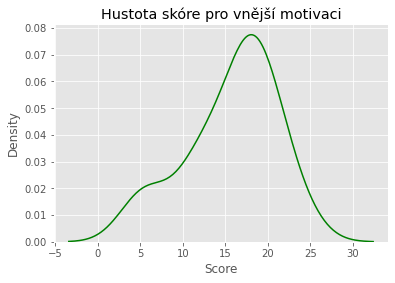

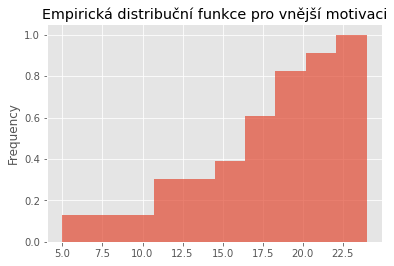

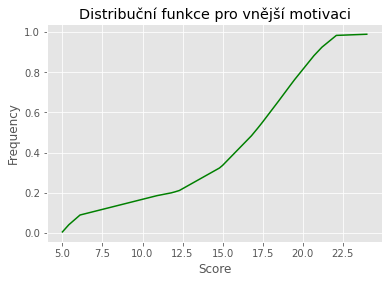

In [398]:
show_plots(df_extrinsic['Score'], 'vnější')
show_cdf(df_extrinsic, 'vnější')

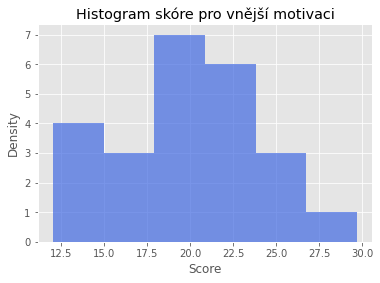

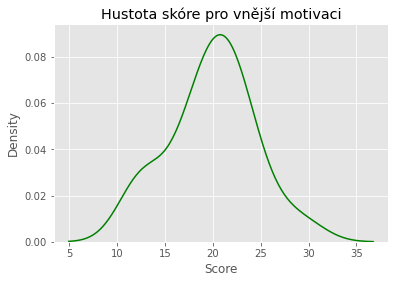

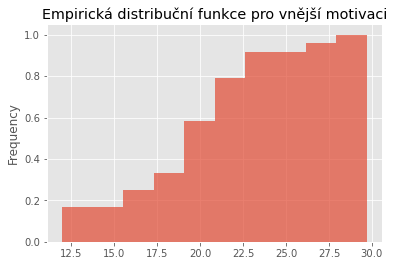

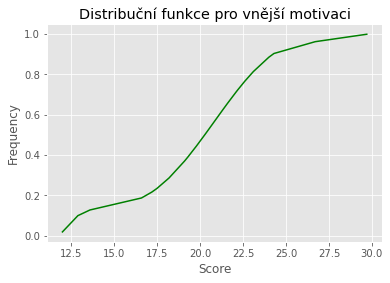

In [399]:
show_plots(df_intrinsic['Score'], 'vnější')
show_cdf(df_intrinsic, 'vnější')

## Úloha 03
Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.

Způsob řešení: Pro odhad normálního rozdělení byla použita funkce z knihovny SciPy - .fit(),
která vrací nejbližší hodnoty pro průměra směrodatnou odchylku. Střední hodnotu odhadujeme podle získaného průměru.

Exponenciální i uniformní rozdělení je odhadnuto pomocí vzorců získaných při odhadu momentovou metodou probírané na cvičení.

In [1]:
def xlim():
    xmin, xmax = plt.xlim()
    return np.linspace(xmin, xmax, 100)

def norm(df):
    mean, std = stats.norm.fit(df["Score"])

    fig, ax = plt.subplots()
    ax.hist(df['Score'], bins=7, alpha=0.7, density=True)

    p = stats.norm.pdf(xlim(), mean, std)
    ax.plot(xlim(), p, 'k', linewidth=2)
    plt.xlabel('skóre\n' + 'odhadnutá střední hodnota = ' + str(round(mean,2)) +
               '\nodhadnutá směrodatná odchylka = ' + str(round(std,2)))
    plt.title('Porovnání histogramu s normálním rozdělením')
    plt.show()

def exp(df):
    fig, ax = plt.subplots()
    ax.hist(df['Score'], bins=7, alpha=0.7, density=True)

    lam = float(1/df.mean()["Score"])
    p = lam * np.exp(-lam * xlim())
    ax.plot(xlim(), p, 'k', linewidth=2)
    plt.xlabel('skóre'+ '\nodhanutý parametr lambda = ' + str(round(lam,8)))
    plt.title('Porovnání histogramu s exponenciálním rozdělením')
    plt.show()

def uni(df):
    fig, ax = plt.subplots()
    ax.hist(df['Score'], bins=7, alpha=0.7, density=True)

    val = df.loc[:,'Score'].values
    inner_value = 3*( (np.sum(np.power(val,2)))/val.size - np.power(np.mean(val),2))
    a = df.mean()["Score"] - np.sqrt(inner_value)
    b = df.mean()["Score"] + np.sqrt(inner_value)

    p = stats.uniform.pdf(xlim(),a,b-a)
    ax.plot(xlim(), p, 'k', linewidth=2)
    plt.xlabel('skóre\n' 'odhadnutý parametr a = ' + str(round(a,4)) +
               '\nodhadnutý parametr b = ' + str(round(b,4)))
    plt.title('Porovnání histogramu s uniformním rozdělením')
    plt.show()


def show_plots(df):
    norm(df)
    exp(df)
    uni(df)

Zobrazení pro vnitřní motivaci

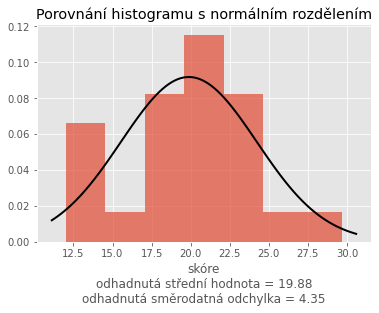

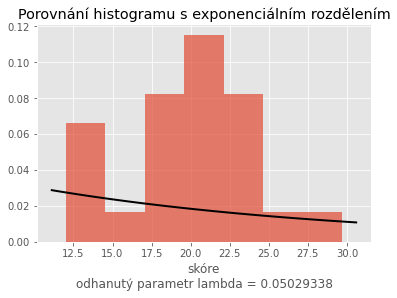

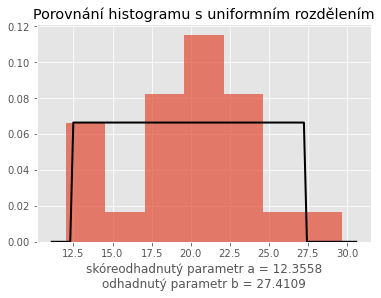

In [358]:
show_plots(df_intrinsic)

Zobrazení pro vnější motivaci

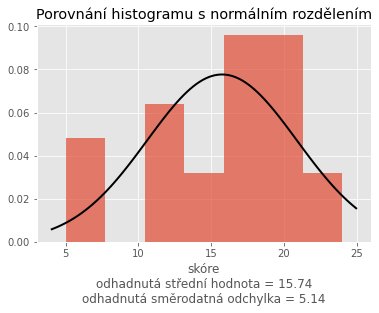

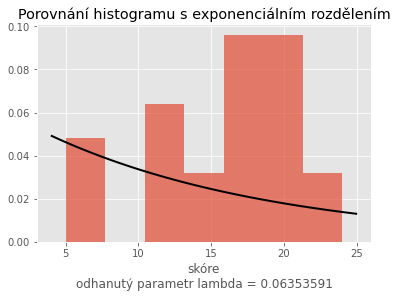

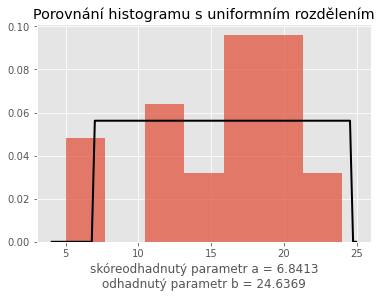

In [359]:
show_plots(df_extrinsic)

Na základě z dat získaných grafů jsme odhadli, že obě skupiny dat mají největší shodu s normálním rozdělením.
Exponencální rozdělení neodpovídá klesajícímu trendu naměřených dat směrem k nule. Data zároveň vykazují
příliš velké rozdíly v četnosti, aby mohla být v souladu s uniformním rozdělením.

## Úloha 04
 Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší,
 s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.

In [389]:
def generate_norm(df):
    mean, std = stats.norm.fit(df["Score"])
    r = np.random.normal(mean,std,100)

    fig, ax = plt.subplots()
    ax.hist(df['Score'], bins=7, alpha=0.7, density=True, color='royalblue')
    plt.xlabel('skóre')
    plt.title('Histogram s originálními daty')
    fig, ax2 = plt.subplots()
    ax2.hist(r, bins=7, alpha=0.7, density=True, color='firebrick')
    plt.xlabel('skóre')
    plt.title('Histogram s vygenerovanými daty')

    plt.show()

Histogramy pro skupinu s vnitřní motivací

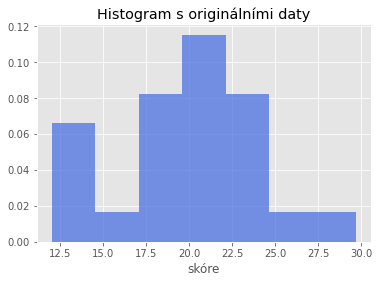

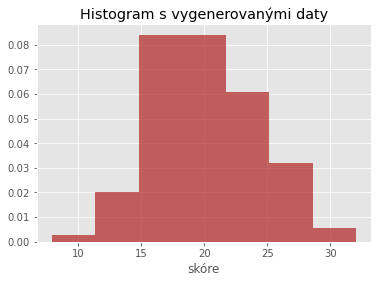

In [390]:
generate_norm(df_intrinsic)

Histogramy pro skupinu s vnější motivací

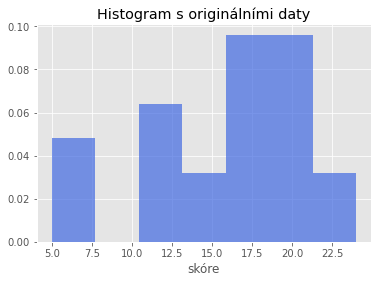

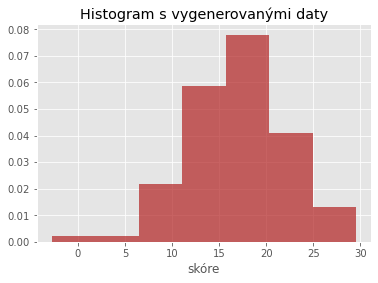

In [391]:
generate_norm(df_extrinsic)

Výsledné histogramy nejsou totožné, přesto je patrná vzájemná podobnost.
Odlišnosti mohou být způsobeny malým počtem naměřených i vygenerovaných hodnot.
Pro větší vypovídající hodnotu by proto bylo vhodné získat více dat.

## Úloha 05
Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.

In [363]:
# alpha = 1 - 0.95 -> alpha_half = 0.025

def compute_stats(df):
    mean = df.mean()["Score"]
    std = df.std()["Score"]
    return mean, std


def compute_confidence_interval_bilateral(df):
    mean, std = compute_stats(df)
    return stats.norm.interval(0.95, mean, std)


def plot_intervals(intervals=[]):
    num_intervals = len(intervals)
    general_min = 0
    general_max = 30
    colors = ['g', 'r']
    labels = ['intrinsic', 'extrinsic']
    fig, ax = plt.subplots()
    for i, (min_int, max_int) in enumerate(intervals):
        ax.hlines(y=i, xmin=general_min, xmax=general_max, colors='b', alpha=0.2)
        ax.hlines(y=i, xmin=min_int, xmax=max_int, colors=colors[i], label=labels[i])
        ax.scatter(y=i, x=min_int, marker='<', c=colors[i])
        ax.scatter(y=i, x=max_int, marker='>', c=colors[i])
        ax.scatter(y=i, x=sum(intervals[i])/2, marker='|', c='black')
        
    plt.legend(loc='center left')
    plt.xlabel('Skóre')
    plt.title('Oboustranný 95% konfidenční interval pro střední hodnoty skóre\n při vnitřní(intrinsic) a vnější(extrinsic) motivaci')
    plt.yticks(range(len(intervals)))
    plt.show()
    

def interval_in_histogram(df, interval):
    fig, ax = plt.subplots()
    min_int = interval[0]
    max_int = interval[1]
    
    ax.hist(df['Score'], bins=7, alpha=0.7)
    ax.hlines(y=1, xmin=min_int, xmax=max_int, colors='black')
    ax.scatter(y=1, x=min_int, marker='|', c='black')
    ax.scatter(y=1, x=max_int, marker='|', c='black')
    
    plt.show()
    

Knihovna scipy ma k dispozici funkci na vypocet konfidenčního intervalu. Jako parametry bere konfidenci, střední hodnotu a směrodatnou odchylku. Z této funkce poté vypadne rovnou interval, který můžeme zobrazit. 

Oboustranný 95% konfidenční interval střední hodnoty skóre:
	-při vnitřní motivaci: (11.182047740555275, 28.584619148635397)
	-při vnější motivaci:  (5.444231695978827, 26.034029588227398)


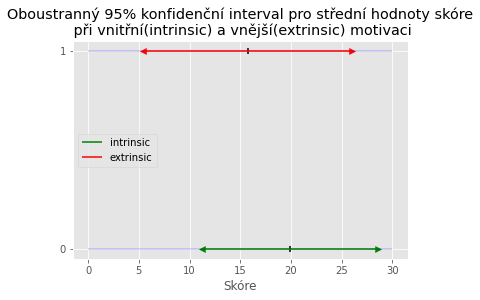

Oboustranný 95% konfidenční interval skóre při vnitřní motivaci.


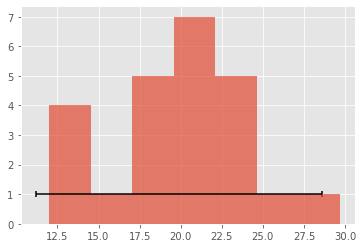

Oboustranný 95% konfidenční interval skóre při vnější motivaci.


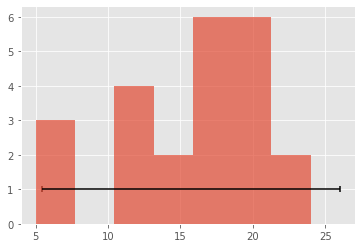

In [364]:
CI_intrinsic = compute_confidence_interval_bilateral(df_intrinsic)
CI_extrinsic = compute_confidence_interval_bilateral(df_extrinsic)

print("Oboustranný 95% konfidenční interval střední hodnoty skóre:")
print("\t-při vnitřní motivaci:", CI_intrinsic)
print("\t-při vnější motivaci: ", CI_extrinsic)
plot_intervals([CI_intrinsic, CI_extrinsic])

print("Oboustranný 95% konfidenční interval skóre při vnitřní motivaci.")
interval_in_histogram(df_intrinsic, CI_intrinsic)
print("Oboustranný 95% konfidenční interval skóre při vnější motivaci.")
interval_in_histogram(df_extrinsic, CI_extrinsic)

## Úloha 06
Pro každou skupinu zvlášť otestujte na hladině významnosti 5% hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.

In [365]:
def validate_test(p_value, alpha):
    print("P-hodnota = {} -> ".format(p_value), end=" ")
    if p_value > alpha:
        print("Nezamítám hypotézu H_0 na hladině významnosti {}%".format(alpha*100))
    else:
        print("Zamítám hypotézu H_0 na hladině významnosti {}%".format(alpha*100))

def test_mean_1samp(df, K, alpha):
    print("Testuji hypotézu H_0: K == {} oproti alternativě H_a: K != {}, na hladině významnosti {}%.".format(K, K, alpha*100))
    t_stats, p_value = ttest_1samp(df["Score"], K)
    
    validate_test(p_value, alpha)

Knihovna scipy obsahuje i funkce na testy. V této úloze potřebujeme otestovat nějakou hodnotu k jednomu datasetu. Takovému účelu odpovídá funkce ttest_1samp.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

Alpha == 0.05, podle výstypu p-hodnoty z funkce ttest_1samp lze rozhodnout, zdali můžeme hypotézu zamítnout nebo nikoliv. Pokud je p-hodnota větší, než alfa, pravděpodobnost, že jsme se s K trefili je dostatečně vysoká. Tedy hypotézu nezamítáme. Analogicky naopak.

In [366]:
alpha = 0.05
K = 5

test_mean_1samp(df_extrinsic, K, alpha)

Testuji hypotézu H_0: K == 5 oproti alternativě H_a: K != 5, na hladině významnosti 5.0%.
P-hodnota = 1.724422212344587e-09 ->  Zamítám hypotézu H_0 na hladině významnosti 5.0%


## Úloha 07
Na hladině spolehlivosti 5% otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

In [367]:
def test_mean_2datasets(df1, df2, alpha, equal_var=False):
    print("Předpoklad totožných rozptylů.") if equal_var else print("Nepředpokládáme totožné rozptyly.")
    print("Testuji hypotézu H_0: mean(df1) == mean(df2) oproti alternativě H_a: mean(df1) != mean(df2), na hladině významnosti {}%.".format(alpha*100))
    t_stats, p_value = ttest_ind(df1["Score"], df2["Score"], equal_var=equal_var)
    
    validate_test(p_value, alpha)

Scipy obsahuje další funkci, která vypočítá T-test pro stření hodnoty dvou datasetů. Funkce implicitně předpokládá rovnost rozptylu obou datasetů (parametr equal_var). Test vyzkoušíme jak pro předpoklad totožných rozptylů, tak pro předpoklad rozptylů různých. V obou případech hypotézu zamítáme.<br>
Rozptyl našich datasetů se liší, 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [368]:
test_mean_2datasets(df_intrinsic, df_extrinsic, 0.05)
print('---------------------------')
test_mean_2datasets(df_intrinsic, df_extrinsic, 0.05, equal_var=True)

Nepředpokládáme totožné rozptyly.
Testuji hypotézu H_0: mean(df1) == mean(df2) oproti alternativě H_a: mean(df1) != mean(df2), na hladině významnosti 5.0%.
P-hodnota = 0.005617536175446492 ->  Zamítám hypotézu H_0 na hladině významnosti 5.0%
---------------------------
Předpoklad totožných rozptylů.
Testuji hypotézu H_0: mean(df1) == mean(df2) oproti alternativě H_a: mean(df1) != mean(df2), na hladině významnosti 5.0%.
P-hodnota = 0.0053664783849123685 ->  Zamítám hypotézu H_0 na hladině významnosti 5.0%


##### Poznámka
Obě funkce, ttest_ind i ttest_1samp počítají oboustranný interval. To je v pořádku, jelikož chceme pouze zjistit, zda se střední hodnoty rovnají nebo ne. Pokud bychom zjišťovali, zda střední hodnota spadá do určitého intervalu, použili bychom jednostranný interval.